In [5]:
import numpy as np
import tqdm
import matplotlib.pyplot as plt
def unit_step_func(x):
    return np.where(x > 0, 1, -1)

def train_perceptron(X, y, learning_rate=0.1, n_iters=10000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    y_ = np.array([1 if i > 0 else -1 for i in y])

    for _ in tqdm.tqdm(range(n_iters)):
        for idx, x_i in enumerate(X):
            linear_output = np.dot(x_i, weights) + bias
            y_predicted = unit_step_func(linear_output)
            update = learning_rate * (y_[idx] - y_predicted)
            weights += update * x_i
            bias += update

    return weights, bias

def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return unit_step_func(linear_output)

def generate_data(n_samples=100):
    np.random.seed(42)  # Ensure reproducibility

    # Generate data
    x1 = np.random.normal(10, 2, n_samples)
    x2 = np.random.normal(12, 2, n_samples)
    y = np.ones(n_samples)  # Labels for the first class

    x1_ = np.random.normal(5, 2, n_samples)
    x2_ = np.random.normal(6, 2, n_samples)
    y_ = -np.ones(n_samples)  # Labels for the second class

    # Combine the data
    X = np.vstack((np.column_stack((x1, x2)), np.column_stack((x1_, x2_))))
    y = np.concatenate((y, y_))

    return X, y


In [6]:
def plot_decision_boundary(X, y, weights, bias):
    # 設置x軸的範圍
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    
    # 預測網格上每個點的類別
    Z = predict(np.c_[xx1.ravel(), xx2.ravel()], weights, bias)
    Z = Z.reshape(xx1.shape)

    # 繪製決策邊界和數據點
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.Wistia)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Wistia, edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')

100%|██████████| 10000/10000 [00:14<00:00, 691.87it/s]


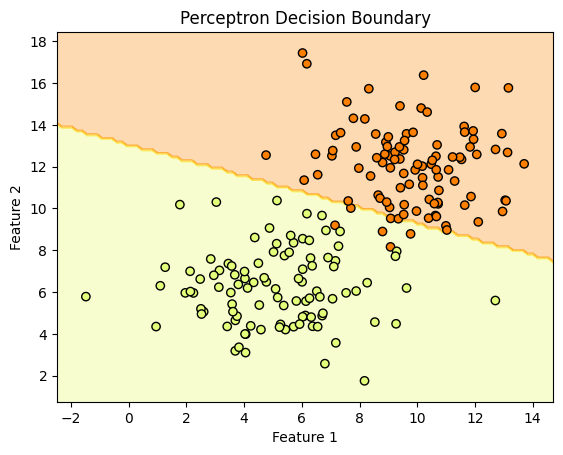

In [7]:
# 生成訓練數據
X, y = generate_data(100)

# 訓練感知器
weights, bias = train_perceptron(X, y)

# 繪製決策邊界
plot_decision_boundary(X, y, weights, bias)
plt.show()